In [151]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import math
import pandas as pd
from  imageio import imread
import joblib

In [2]:
import os

In [3]:
import cv2

In [4]:
Dog96 = imread('./TIFFtraining/Dog96.tif')

/home/rappio/anaconda3/lib/python3.7/site-packages/imageio/plugins/_tifffile.py:4275: UserWarning: 999 is not a valid EXTRASAMPLE
  warnings.warn(str(e))


In [5]:
Dog96.shape

(64, 64, 2)

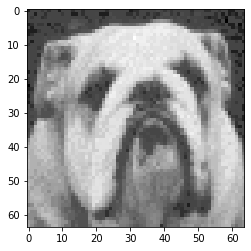

In [6]:
plt.imshow(Dog96[:,:,0],cmap='gray')

In [7]:
Dog96=np.array(Dog96[:,:,0])

In [8]:
dim = (64, 64)

#convert 28x28 grayscale to 48x48 rgb channels
def to_rgb(img):
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
    img_rgb = np.asarray(np.dstack((img, img, img)), dtype=np.uint8)
    return img_rgb

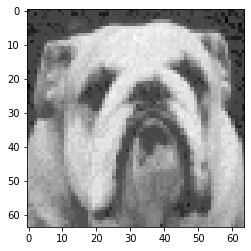

In [9]:
plt.imshow(to_rgb(Dog96))

In [10]:
X_list=[]
y_list=[]
for x in os.listdir("./TIFFtraining/"):
    if "Dog96" in x:
        continue
    else:
        vec=imread('./TIFFtraining/'+x)
        vec=np.array(vec)
        vec=to_rgb(vec)
        X_list.append(vec)
        if "Cat" in x:
            y_list.append(1)
        else:
            y_list.append(0)

In [11]:
len(X_list)

159

In [12]:
len(y_list)

159

In [13]:
X_list.append(to_rgb(Dog96))

In [14]:
y_list.append(0)

In [15]:
X=np.array(X_list)

In [16]:
#X=X.T

In [17]:
y=np.array(y_list)

In [18]:
y=y.reshape(160,1)

In [19]:
X.shape

(160, 64, 64, 3)

In [20]:
y.shape

(160, 1)

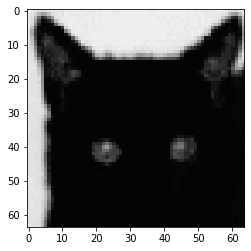

In [21]:
plt.imshow(X[155])

In [22]:
y[155]

array([1])

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.1.0'

In [25]:
X.shape,y.shape

((160, 64, 64, 3), (160, 1))

In [26]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [27]:
X,y=unison_shuffled_copies(X, y)

In [28]:
from keras import layers, models, optimizers
from keras.applications import VGG16
from keras.regularizers import l2


conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64, 64,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

Using TensorFlow backend.


In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 14,845,889
Trainable params: 131,201
Non-trainable params: 14,714,688
_________________________________________________________________


In [30]:
2048*64+64

131136

In [67]:
%time history = model.fit(X, y, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

CPU times: user 5.25 s, sys: 1.03 s, total: 6.28 s
Wall time: 22.1 s


In [68]:
%%time
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 92.105263
CPU times: user 14 ms, sys: 395 µs, total: 14.4 ms
Wall time: 49.3 ms


In [69]:
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

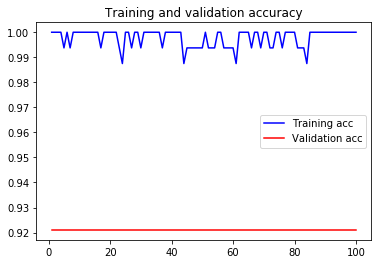

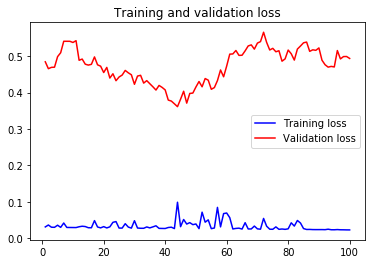

In [70]:
plot_accuracy_and_loss(history)

In [31]:
from scipy.io import loadmat

In [32]:
test = loadmat('PatternRecAns.mat')

In [33]:
y_test=test['hiddenlabels']

In [34]:
X_test=test['TestSet']

In [35]:
y_test=y_test.reshape(38,1)

In [36]:
X_test.shape

(4096, 38)

In [37]:
X.shape

(160, 64, 64, 3)

In [38]:
X_test.shape

(4096, 38)

In [39]:
X_test=X_test.reshape(64,64,38)

In [40]:
X_test=X_test.T

In [41]:
X_test.shape

(38, 64, 64)

In [42]:
X.shape

(160, 64, 64, 3)

In [43]:
temp=X_test[0,:,:]
temp=temp.reshape(64,64,1)

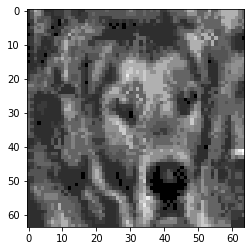

In [44]:
plt.imshow(temp[:,:,0],cmap='gray')

In [45]:
X_test_list=[]
for i in range(38):
    temp=X_test[i,:,:]
    temp=temp.reshape(64,64,1)
    temp=to_rgb(temp)  
    X_test_list.append(temp)

In [46]:
X_test=np.array(X_test_list)

In [47]:
X_test.shape

(38, 64, 64, 3)

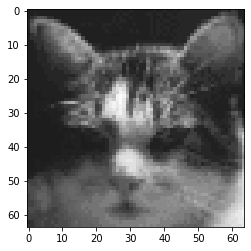

In [48]:
plt.imshow(X_test[22,:,:,:],cmap='gray')

In [49]:
y_test[22]

array([1], dtype=uint8)

In [50]:
y_test.shape

(38, 1)

In [117]:
%%time
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 94.736844
CPU times: user 294 ms, sys: 146 ms, total: 440 ms
Wall time: 475 ms


In [72]:
from bayes_opt import BayesianOptimization

In [84]:
def vgg_cat_dog_grey(l1_units,l1_d,epochs,batch_size,lr):
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    #model.add(layers.Dropout(0.5))
    model.add(layers.Dense(int(l1_units), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(l1_d))
    model.add(layers.Dense(1, activation='sigmoid'))

    conv_base.trainable = False

    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['acc'])

    model.fit(X, y, epochs=int(epochs), batch_size=int(batch_size), validation_data=(X_test, y_test), verbose=0)
    results = model.evaluate(X_test,y_test)
    return results[1]

In [85]:
vgg_cat_dog_grey(32.2,0.5,1,32,0.001)

38/38 [==============================] - 0s 2ms/step


0.9473684430122375

In [86]:
catdogBO = BayesianOptimization(vgg_cat_dog_grey,
                                 {'l1_units':(16,2048),
                                    'l1_d':(0.01,0.99),
                                    'epochs':(1,500),
                                    'batch_size':(16,160),
                                   'lr':(0.00001,0.1)
                                  })

In [87]:
%time catdogBO.maximize(init_points=4,n_iter=16)

|   iter    |  target   | batch_... |  epochs   |   l1_d    | l1_units  |    lr     |
-------------------------------------------------------------------------------------
38/38 [==============================] - 0s 1ms/step
|  1        |  0.9211   |  82.06    |  306.7    |  0.8757   |  85.57    |  0.02186  |
38/38 [==============================] - 0s 1ms/step
|  2        |  0.9474   |  83.45    |  243.1    |  0.6155   |  1.496e+0 |  0.05995  |
38/38 [==============================] - 0s 1ms/step
|  3        |  0.9211   |  74.92    |  37.86    |  0.07051  |  1.724e+0 |  0.08843  |
38/38 [==============================] - 0s 1ms/step
|  4        |  0.9737   |  83.27    |  195.5    |  0.9748   |  1.013e+0 |  0.07518  |
38/38 [==============================] - 0s 1ms/step
|  5        |  0.9737   |  156.2    |  498.1    |  0.4057   |  801.8    |  0.09243  |
38/38 [==============================] - 0s 1ms/step
|  6        |  0.9737   |  68.24    |  191.6    |  0.01192  |  1.015e+0 |  0.025

In [92]:
catdogBO.max['params']

{'batch_size': 47.96894136082377,
 'epochs': 5.961407376885448,
 'l1_d': 0.387128105339946,
 'l1_units': 25.626767937360057,
 'lr': 0.04721016249072883}

In [93]:
best_params=catdogBO.max['params']

In [96]:
vgg_cat_dog_grey(best_params['l1_units'],best_params['l1_d'],best_params['epochs'],best_params['batch_size'],best_params['lr'])

38/38 [==============================] - 0s 1ms/step


0.9736841917037964

In [98]:
def vgg_cat_dog_grey_m_h(l1_units,l1_d,epochs,batch_size,lr):
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dense(int(l1_units), activation='relu',kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(l1_d))
    model.add(layers.Dense(1, activation='sigmoid'))

    conv_base.trainable = False

    model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=lr),
              metrics=['acc'])

    history=model.fit(X, y, epochs=int(epochs), batch_size=int(batch_size), validation_data=(X_test, y_test), verbose=0)
    results = model.evaluate(X_test,y_test)
    return results,model,history

In [133]:
results,model,history=vgg_cat_dog_grey_m_h(best_params['l1_units'],best_params['l1_d'],best_params['epochs'],best_params['batch_size'],best_params['lr'])

38/38 [==============================] - 0s 1ms/step


In [143]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_32 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 25)                51225     
_________________________________________________________________
dropout_31 (Dropout)         (None, 25)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 26        
Total params: 14,765,939
Trainable params: 51,251
Non-trainable params: 14,714,688
_________________________________________________________________


In [134]:
results

[0.8561615849796095, 1.0]

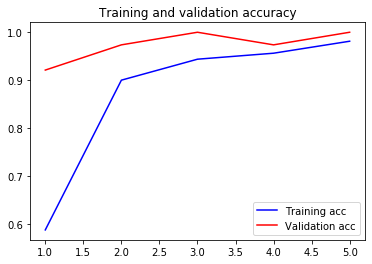

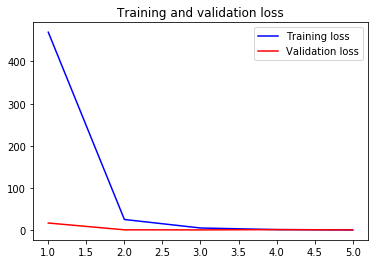

In [135]:
plot_accuracy_and_loss(history)

In [136]:
X_test.shape

(38, 64, 64, 3)

In [144]:
res=pd.DataFrame([y_test.reshape(38,),np.round(model.predict(X_test).reshape(38,),6)])

In [145]:
res=res.T

In [146]:
res.columns=['actual','predicted']

In [147]:
res

,actual,predicted
0,0.0,0.000000
1,1.0,1.000000
2,0.0,0.000000
3,1.0,1.000000
4,1.0,1.000000
5,1.0,1.000000
6,1.0,1.000000
7,1.0,1.000000
8,0.0,0.000000
9,1.0,1.000000


In [140]:
res[(res.predicted>0.1)&(res.predicted<0.9)]

,actual,predicted


In [141]:
for i in list(res[(res.predicted>0.1)&(res.predicted<0.9)].index):
    plt.imshow(X_test[i,:,:,:],cmap='gray')
    plt.show()

In [148]:
model.save('best_cat_dog_model.h5')

In [149]:
type(history)

keras.callbacks.callbacks.History

In [152]:
joblib.dump(history,'history_best_model.pkl')

['history_best_model.pkl']